In [1]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
addict                       2.4.0
aliyun-python-sdk-core       2.15.1
aliyun-python-sdk-kms        2.16.2
asttokens                    2.4.1
astunparse                   1.6.3
asynctest                    0.13.0
attrs                        23.2.0
autocommand                  2.2.2
backports.tarfile            1.1.0
boto3                        1.34.85
botocore                     1.34.85
Brotli                       1.0.9
cachetools                   5.3.3
certifi                      2024.2.2
cffi                         1.16.0
chardet                      5.2.0
charset-normalizer           2.0.4
click                        8.1.7
codecov                      2.1.13
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
coverage                     7.4.4
crcmod                       1.7
cryptography                 42.0.5


In [3]:
!pip install torch==2.0.0 torchvision==0.15.1
!pip install -U openmim
!mim install "mmengine>=0.7.1,<1.1.0"
!mim install "mmcv>=2.0.0rc4,<2.1.0"
!mim install "mmdet>=3.0.0rc5,<3.2.0"
!mim install mmocr

Looking in links: https://download.openmmlab.com/mmcv/dist/cpu/torch2.0.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cpu/torch2.0.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cpu/torch2.0.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cpu/torch2.0.0/index.html


MMOCR

In [18]:
from mmocr.apis import MMOCRInferencer
# Load models into memory
ocr = MMOCRInferencer(det='DBNet', rec='ABINet')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnet/dbnet_resnet50-oclip_1200e_icdar2015/dbnet_resnet50-oclip_1200e_icdar2015_20221102_115917-bde8c87a.pth
04/19 14:45:34 - mmengine - WARNING - Failed to search registry with scope "mmocr" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmocr" is a correct scope, or whether the registry is initialized.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/abinet/abinet_20e_st-an_mj/abinet_20e_st-an_mj_20221005_012617-ead8c139.pth


c:\Users\helen\anaconda3\envs\engr2900\lib\site-packages\mmengine\visualization\visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
c:\Users\helen\anaconda3\envs\engr2900\lib\site-packages\mmocr\models\textrecog\module_losses\ce_module_loss.py:101: UserWarning: padding does not exist in the dictionary
  warnings.warn(
c:\Users\helen\anaconda3\envs\engr2900\lib\site-packages\mmocr\models\textrecog\postprocessors\base.py:60: UserWarning: padding does not exist in the dictionary
  warnings.warn(


The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



In [28]:
# Perform inference
result = ocr('med_diary.jpg', show=True)

recognized_texts = [item['rec_texts'] for item in result['predictions']]
flat_list_of_texts = [text for sublist in recognized_texts for text in sublist]
mmocr_med = ' '.join(flat_list_of_texts)
print(mmocr_med)

c:\Users\helen\anaconda3\envs\engr2900\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

c:\Users\helen\anaconda3\envs\engr2900\lib\site-packages\mmcv\cnn\bricks\transformer.py:819: UserWarning: Use same 
attn_mask in all attentions in BaseTransformerLayer 
  warnings.warn(f'Use same attn_mask in all attentions in '

c:\Users\helen\anaconda3\envs\engr2900\lib\site-packages\torch\nn\functional.py:4999: UserWarning: Support for 
mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(

a t some be doing shtthing good businesses because all should is a i i i i a a a i far i a a good i a od oo ve


In [19]:
result = ocr('hard_diary.jpg', show=True)

recognized_texts = [item['rec_texts'] for item in result['predictions']]
flat_list_of_texts = [text for sublist in recognized_texts for text in sublist]
mmocr_hard = ' '.join(flat_list_of_texts)
print(mmocr_hard)

c:\Users\helen\anaconda3\envs\engr2900\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

c:\Users\helen\anaconda3\envs\engr2900\lib\site-packages\mmcv\cnn\bricks\transformer.py:819: UserWarning: Use same 
attn_mask in all attentions in BaseTransformerLayer 
  warnings.warn(f'Use same attn_mask in all attentions in '

c:\Users\helen\anaconda3\envs\engr2900\lib\site-packages\torch\nn\functional.py:4999: UserWarning: Support for 
mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(

offer discovered everything they had to in the worlds was it bookss when found that escape could places better high school was when me helps to imagine the people and movie before the read it book weirdos who loves watch to the movies for of one those more books seen the thattd i movie to started then the read so more even and than thrilling was scary try book book the so movie a give figured the the id king loved stephen shining the called suggested grandma my then read book as much was not working still but while a summers over the little read would reading stopped 5 pleasure for reading waste to time have didnt so thatthooudnt much so school high classes english in my apr lot read to had


Tesseract

In [15]:
!pip install opencv-python pytesseract

import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\helen\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

In [27]:
tesseract_med=pytesseract.image_to_string('med_diary.jpg', lang='eng')
print(tesseract_med)

\Ne Stoet With Good

Because all businesses should
be sess pera: bs pees



In [16]:
tesseract_hard=pytesseract.image_to_string('hard_diary.jpg', lang='eng')
print(tesseract_hard)

——

Yeod a lor in _ my Ap
\ high G oO

\ ry i
dour ead o litte “Gver the Suvnmers
Ine, Toss

wold, lout Still not
Yeed




Google Cloud Vision API

In [2]:
!pip install google-cloud-vision

  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
   ---------------------------------------- 0.0/459.6 kB ? eta -:--:--
   ---------- ----------------------------- 122.9/459.6 kB 3.6 MB/s eta 0:00:01
   ------------------------------------ --- 419.8/459.6 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 459.6/459.6 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/138.3 kB ? eta -:--:--
   ---------------------------------------- 138.3/138.3 kB 8.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/48.8 kB ? eta -:--:--
   ---------------------------------------- 48.8/48.8 kB ? eta 0:00:00
   ---------------------------------------- 0.0/229.1 kB ? eta -:--:--
   ---------------------------------------- 229.1/229.1 kB 7.1 MB/s eta 0:00:00
Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl (413 kB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ------ ---------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
coremltools 6.3.0 requires protobuf<=4.0.0,>=3.1.0, but you have protobuf 4.25.3 which is incompatible.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.25.3 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.25.3 which is incompatible.


In [4]:
import os
from google.cloud import vision
from google.cloud.vision_v1 import types

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'google-vision-credentials.json'
client = vision.ImageAnnotatorClient()


In [23]:
with open('med_diary.jpg', 'rb') as image_file:
    content = image_file.read()

image = types.Image(content=content)

response = client.text_detection(image=image)
text_annotations = response.text_annotations
google_med = text_annotations[0].description if text_annotations else ""

print(google_med)

We Start With Good
Because all businesses should
be doing something good.


In [24]:
with open('hard_diary.jpg', 'rb') as image_file:
    content = image_file.read()

image = types.Image(content=content)

response = client.text_detection(image=image)
text_annotations = response.text_annotations
google_hard = text_annotations[0].description if text_annotations else ""

print(google_hard)

I had to read a lot in my Ap
English classes in high school, so
much so that I thought I didn't
have time to waste on reading for
pleasure. So I stopped reading. I
would read a little over the summers
while I was working, but still not
as much. Then I read a book my
grandma suggested called The
Shining by Stephen King. I loved
the movie, so I figured I'd give the
book a try. The book was so scary
and thrilling, even more so than
the movie. Then I started to read
more books that I'd seen the
movies for. I'm one of those
weirdos who loves to watch the
movie before I read the book. It
helps me to imagine the people and
places better High school was when
I found that I could escape to
the worlds in books. It was when
I discovered everything they had to
offer


Evaluation

In [13]:
!pip install python-Levenshtein

import matplotlib.pyplot as plt
import Levenshtein

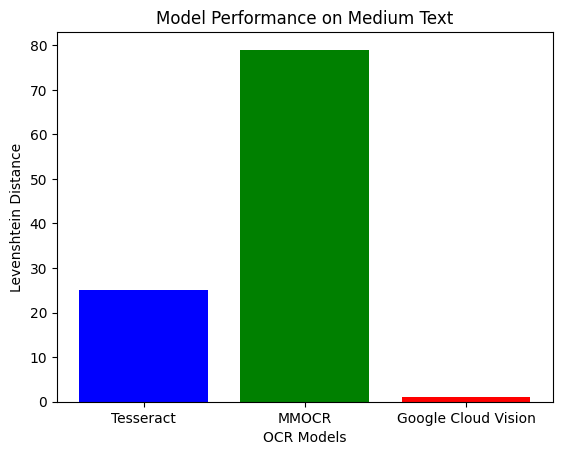

In [29]:
# Medium: Few, spaced-out lines of clear handwriting

med_ground_truth = "We Start With Good\nBecause all businesses should be doing something good."
med_levenshtein_distance_tesseract = Levenshtein.distance(med_ground_truth, tesseract_med)
med_levenshtein_distance_mmocr = Levenshtein.distance(med_ground_truth, mmocr_med)
med_levenshtein_distance_google = Levenshtein.distance(med_ground_truth, google_med)


models = ['Tesseract', 'MMOCR', 'Google Cloud Vision']
med_distances = [med_levenshtein_distance_tesseract, med_levenshtein_distance_mmocr, med_levenshtein_distance_google]

plt.bar(models, med_distances, color=['blue', 'green', 'red'])
plt.xlabel('OCR Models')
plt.ylabel('Levenshtein Distance')
plt.title('Model Performance on Medium Text')
plt.show()

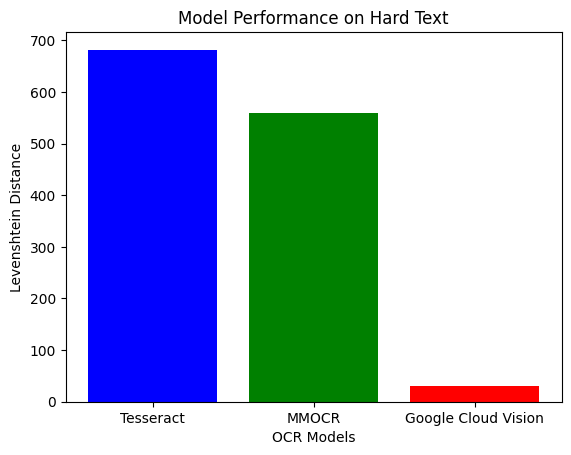

In [21]:
# Hard: Many, dense lines of clear handwriting

hard_ground_truth = "I had to read a lot in my AP English classes in high school, so much so that I thought I didn't have time to waste of reading for pleasure, so I stopped reading. I would read a little over the summers while I was working but still not as much. Then I read a book my grandma suggested called The Shining by Stephen King. I loved the movie, so I figured I'd give the book a try. The book was so scary and thrilling even more so than the movie. Then I started to read more books that I'd seen the movies for. I'm one of those weirdos who loves to watch the movie before I read the book. It helps me to imagine the people and places better. High school was when I found that I could escape to the worlds in books. It was when I discovered everything they had to offer."
hard_levenshtein_distance_tesseract = Levenshtein.distance(hard_ground_truth, tesseract_hard)
hard_levenshtein_distance_mmocr = Levenshtein.distance(hard_ground_truth, mmocr_hard)
hard_levenshtein_distance_google = Levenshtein.distance(hard_ground_truth, google_hard)

models = ['Tesseract', 'MMOCR', 'Google Cloud Vision']
hard_distances = [hard_levenshtein_distance_tesseract, hard_levenshtein_distance_mmocr, hard_levenshtein_distance_google]

plt.bar(models, hard_distances, color=['blue', 'green', 'red'])
plt.xlabel('OCR Models')
plt.ylabel('Levenshtein Distance')
plt.title('Model Performance on Hard Text')
plt.show()